<a href="https://colab.research.google.com/github/roshan-pasha/Machine-Learning/blob/master/Skillenza_final_Roshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'/content'

In [0]:
# train=pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
# sample=pd.read_csv('sample.csv')

In [2]:
#upload
from google.colab import files
upload_train = files.upload()

Saving train.csv to train.csv


In [3]:
#upload
from google.colab import files
upload_test = files.upload()

Saving test.csv to test.csv


In [4]:
#upload
from google.colab import files
upload_submission = files.upload()

Saving sample.csv to sample.csv


In [0]:
#Read File
import io
train = pd.read_csv(io.BytesIO(upload_train['train.csv']))
test =  pd.read_csv(io.BytesIO(upload_test['test.csv']))
sample =  pd.read_csv(io.BytesIO(upload_submission['sample.csv']))

In [6]:
#Display Max columns
pd.pandas.set_option('display.max_columns',None)
train.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [8]:

test.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


In [9]:
sample.head()

,S.no,credit_amount
0,1,1651
1,2,636
2,3,829
3,4,870
4,5,1698


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 25 columns):
serial number       700 non-null int64
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             

In [11]:
train.shape

(700, 25)

In [12]:
train.describe()

,serial number,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.00000,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,202.21688,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,1.00000,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,175.75000,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,350.50000,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,525.25000,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,700.00000,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


In [13]:
train.nunique()

serial number       700
account_info          3
duration_month       32
Loan                  2
Regularity            2
Purpose               5
credit_amount       662
savings_account       5
Saving Account      246
employment_st         5
Salary              577
investment          518
Gender                2
Status                3
gurantors             3
resident_since        4
property_type         4
age                  52
installment_type      3
housing_type          3
credits_no            4
job_type              4
liables               2
telephone             2
foreigner             2
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
serial number       300 non-null int64
account_info        179 non-null object
duration_month      300 non-null int64
Loan                300 non-null object
Regularity          300 non-null object
Purpose             300 non-null object
savings_account     300 non-null object
Saving Account      237 non-null float64
employment_st       300 non-null object
Salary              300 non-null int64
investment          300 non-null float64
Gender              300 non-null object
Status              300 non-null object
gurantors           300 non-null object
resident_since      300 non-null int64
property_type       300 non-null object
age                 300 non-null int64
installment_type    300 non-null object
housing_type        300 non-null object
credits_no          300 non-null int64
job_type            300 non-null object
liables             300 non-null int64
telephone           

In [15]:
test.shape

(300, 24)

In [16]:
test.describe()

,serial number,duration_month,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,300.000000,300.000000,237.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,150.500000,21.486667,293.164557,1600.506667,39.566500,2.930000,36.066667,1.440000,1.17000
std,86.746758,11.525883,657.347574,753.312708,6.634842,1.074997,11.506384,0.589541,0.37626
min,1.000000,4.000000,1.000000,702.000000,26.060000,1.000000,20.000000,1.000000,1.00000
25%,75.750000,12.000000,39.000000,993.750000,34.802500,2.000000,27.000000,1.000000,1.00000
50%,150.500000,20.000000,70.000000,1322.000000,40.110000,3.000000,33.000000,1.000000,1.00000
75%,225.250000,24.000000,109.000000,2125.750000,44.272500,4.000000,43.000000,2.000000,1.00000
max,300.000000,60.000000,3774.000000,3487.000000,53.220000,4.000000,74.000000,4.000000,2.00000


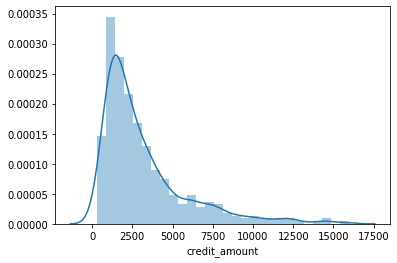

In [17]:
sns.distplot(train.credit_amount)

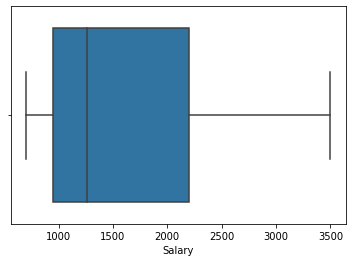

In [18]:
sns.boxplot(train.Salary)

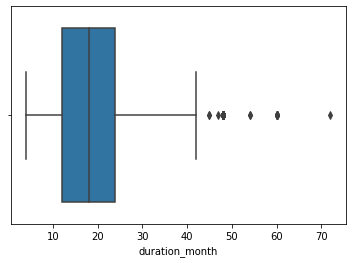

In [19]:
sns.boxplot(train.duration_month)

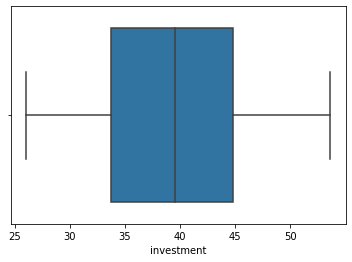

In [20]:
sns.boxplot(train.investment)

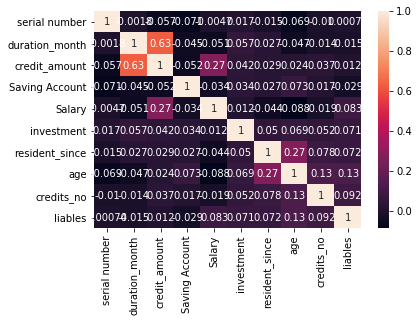

In [22]:
# Checking the correlation
sns.heatmap(train.corr(),annot=True)

In [23]:
train.account_info.value_counts()

SILVER    197
BRONZE    183
GOLD       47
Name: account_info, dtype: int64

In [25]:
# List of categorical columns
cat_col=list(train.select_dtypes(object))
cat_col

['account_info',
 'Loan',
 'Regularity',
 'Purpose',
 'savings_account',
 'employment_st',
 'Gender',
 'Status',
 'gurantors',
 'property_type',
 'installment_type',
 'housing_type',
 'job_type',
 'telephone',
 'foreigner']

In [0]:
# Dropping Serial number
train.drop('serial number',1,inplace=True)

In [0]:
test.drop('serial number',1,inplace=True)

In [28]:
train.shape

(700, 24)

In [29]:
total=pd.concat([train,test],0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [30]:
total.shape

(1000, 24)

In [0]:
dummy=pd.get_dummies(total[cat_col],drop_first=True)

In [0]:
total.drop(cat_col,1,inplace=True)

In [33]:
dummy.head()

,account_info_GOLD,account_info_SILVER,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_st_A72,employment_st_A73,employment_st_A74,employment_st_A75,Gender_M,Status_Married,Status_Umarried,gurantors_A102,gurantors_A103,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [34]:
dummy.shape

(1000, 33)

In [35]:
total.head()

,Salary,Saving Account,age,credit_amount,credits_no,duration_month,investment,liables,resident_since
0,852,NaN,67,1169.0,2,6,34.08,1,4
1,2400,72.0,22,5951.0,1,48,48.00,1,2
2,2078,68.0,49,2096.0,1,12,41.56,2,3
3,2380,73.0,45,7882.0,1,42,47.60,2,4
4,1756,52.0,53,4870.0,2,24,52.68,2,4


In [0]:
total['Saving Account'].fillna(0,inplace=True)

In [0]:
total_final=pd.concat([total,dummy],1)

In [38]:
total_final.head()

,Salary,Saving Account,age,credit_amount,credits_no,duration_month,investment,liables,resident_since,account_info_GOLD,account_info_SILVER,Loan_YES,Regularity_YES,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_st_A72,employment_st_A73,employment_st_A74,employment_st_A75,Gender_M,Status_Married,Status_Umarried,gurantors_A102,gurantors_A103,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,852,0.0,67,1169.0,2,6,34.08,1,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,2400,72.0,22,5951.0,1,48,48.00,1,2,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2078,68.0,49,2096.0,1,12,41.56,2,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,2380,73.0,45,7882.0,1,42,47.60,2,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,1756,52.0,53,4870.0,2,24,52.68,2,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [39]:
train.shape

(700, 24)

In [0]:
#Splitting the data
train_final=total_final[:700]
test_final=total_final[700:]

In [41]:
test_final.drop('credit_amount',1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X=train_final.drop('credit_amount',axis=1)
y=train_final.credit_amount

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [44]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )
#model.fit(X_train, y_train)
model_2.fit(X_train, y_train, eval_metric='rmse', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[16:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4372.94
Will train until validation_0-rmse hasn't improved in 100 rounds.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[100]	validation_0-rmse:2581.87
[200]	validation_0-rmse:2146.54
[300]	validation_0-rmse:2043.76
[400]	validation_0-rmse:2020.36
[500]	validation_0-rmse:2011.94
[600]	validation_0-rmse:2010.99
[700]	validation_0-rmse:2004.18
[800]	validation_0-rmse:1999.88
[900]	validation_0-rmse:1996.35
Stopping. Best iteration:
[886]	validation_0-rmse:1996.28



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

In [45]:
from xgboost import XGBRegressor
xgb1=XGBRegressor(n_estimators=1000,learning_rate=0.01,max_depth=3,colsample_bytree=0.8,
 seed=100)
model_xgb1=xgb1.fit(X_train,y_train)
prediction_test_xgb1=model_xgb1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


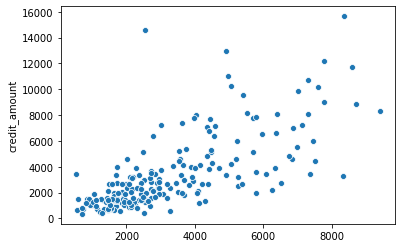

In [46]:
sns.scatterplot(prediction_test_xgb1,y_test)

In [0]:
z=(y_test)-(prediction_test_xgb1)

In [48]:
np.sqrt(z**2).sum()/len(y_test)

1315.6336969284785

In [49]:
from sklearn.model_selection import cross_val_score
all_scores = cross_val_score(estimator=model_xgb1, X=X_train, y=y_train, cv=5,scoring='neg_root_mean_squared_error')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
all_scores

array([-1732.50882125, -1704.18254932, -1912.33382944, -1423.76995516,
       -1715.47959843])

In [51]:
np.mean(all_scores)

-1697.6549507202424

In [0]:
fe=pd.DataFrame(list(zip(X.columns,model_xgb1.feature_importances_)),columns=['feature','importances'])

In [53]:
fe.sort_values(by='importances')

,feature,importances
40,foreigner_A202,0.000000
18,savings_account_A64,0.000000
14,Purpose_A48,0.000000
16,savings_account_A62,0.001516
6,liables,0.004282
21,employment_st_A73,0.004369
23,employment_st_A75,0.005440
28,gurantors_A103,0.005698
35,housing_type_A153,0.006057
24,Gender_M,0.006183


In [54]:
from xgboost import XGBRegressor
xgb1=XGBRegressor(n_estimators=1000,learning_rate=0.01,max_depth=3,colsample_bytree=0.8,
 seed=100)
model_xgb1=xgb1.fit(X,y)
prediction_test_xgb1=model_xgb1.predict(test_final)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.01)
model_ls=ls.fit(X,y)

In [0]:
predict_lasso=ls.predict(test_final)

In [0]:
fe=pd.DataFrame(list(zip(X.columns,model_ls.coef_)),columns=['feature','importances'])

In [58]:
fe.sort_values(by='importances')

,feature,importances
25,Status_Married,-563.973918
8,account_info_GOLD,-516.291352
10,Loan_YES,-479.772160
17,savings_account_A63,-395.233515
23,employment_st_A75,-352.644118
34,housing_type_A152,-297.525992
28,gurantors_A103,-295.654338
6,liables,-273.615595
14,Purpose_A48,-167.979293
22,employment_st_A74,-165.739476


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [0]:
from sklearn.model_selection import cross_val_score
all_scores = cross_val_score(estimator=model_ls, X=X_train, y=y_train, cv=5,scoring='neg_root_mean_squared_error')

In [61]:
all_scores

array([-1722.64890008, -1760.64575211, -1912.27862524, -1458.38477574,
       -1760.22389405])

In [62]:
np.mean(all_scores)

-1722.8363894423449

In [0]:
sample=pd.read_csv('sample.csv')

In [64]:
sample.head()

,S.no,credit_amount
0,1,1651
1,2,636
2,3,829
3,4,870
4,5,1698


In [0]:
sample.credit_amount=(0.4*predict_lasso+prediction_test_xgb1*0.6)+100

In [69]:
sample.head()

,S.no,credit_amount
0,1,796.864597
1,2,6753.632564
2,3,3213.094608
3,4,3336.664665
4,5,3671.993240


In [70]:
sample.shape

(300, 2)

In [0]:
sample.to_csv('submission50.csv',index = False)